In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Cognate kinetics
k1r=718
k2f=1475
k2r_cog=2.1
k3_cog=1529
k4=209
k5_cog=200
k6_cog = 32

t1r = 1000/k1r
t2f = 1000/k2f
t2r_cog = 1000/k2r_cog
t3_cog = 1000/k3_cog
t4 = 1000/k4
t5_cog = 1000/k5_cog
t6_cog = 1000/k6_cog

#Near-cognate kinetics
k1r=718
k2f=1475
k2r_nr = 1120
k3_nr = 6
k4=209

t2r_nr = 1000/k2r_nr
t3_nr = 1000/k3_nr

#Non-cognate kinetics
k1r=718

In [12]:
np.random.seed(1)
t1r_exp=np.random.exponential(t1r,size=4000)
t2f_exp=np.random.exponential(t2f,size=4000)
t2r_cog_exp=np.random.exponential(t2r_cog,size=4000)
t3_cog_exp=np.random.exponential(t3_cog,size=4000)
t4_exp=np.random.exponential(t4,size=4000)
t5_cog_exp=np.random.exponential(t5_cog,size=4000)
t6_cog_exp = np.random.exponential(t6_cog,size=4000)

t2r_nr_exp=np.random.exponential(t2r_nr,size=4000)
t3_nr_exp=np.random.exponential(t3_nr,size=4000)

print(np.average(t1r_exp))
print(np.average(t2f_exp))
print(np.average(t2r_cog_exp))
print(np.average(t3_cog_exp))
print(np.average(t4_exp))
print(np.average(t5_cog_exp))
print(np.average(t6_cog_exp))

print(np.average(t2r_nr_exp))
print(np.average(t3_nr_exp))

1.3871834571507315
0.6654345668683457
476.37105150778655
0.6569705162271943
4.817620598402602
5.010373257065323
31.40871649725717
0.8755426069227361
165.29523708765146


95304
95141
42.529242604996895
1.6759032895474284
0.95141
Probability of rejection after recognition 7e-05


Text(0.5, 1.0, 'Cognate (Succesful)')

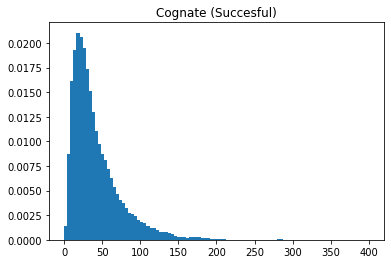

In [5]:
#Cognate calculation including k

dwelltime_cog_success = list()
dwelltime_cog_fail = list()
count = 0
count1 = 0
reject_after_recognition_count = 0
N = 100000

#Set include t2r true to compute the probability of rejection following codon recognition
#Set include t2r false to compute the latency that we used in our simulation
includet2r = True

for i in range(N):
    dwell_t = 0
    state=1
    codon_recognition = False

    while state != 0 and state != 3:
        dwell_t1r = np.random.choice(t1r_exp)
        dwell_t2f = np.random.choice(t2f_exp)
        if state==1:
            if dwell_t1r<dwell_t2f:
                dwell_t+=np.random.choice(t1r_exp)
                dwelltime_cog_fail.append(dwell_t)
                state=0
                if codon_recognition:
                    reject_after_recognition_count +=1
                continue;
            else:
                dwell_t+=np.random.choice(t2f_exp)
                state = 2
                codon_recognition = True
                
        if state==2:
            count+=1
            dwell_t2r_cog = np.random.choice(t2r_cog_exp)
            dwell_t3_cog = np.random.choice(t3_cog_exp)
            if dwell_t2r_cog<dwell_t3_cog:
                if includet2r:
                    dwell_t+= np.random.choice(t2r_cog_exp)
                    state = 1
                else:
                    state = 2
            else:
                count1+=1
                dwell_t += np.random.choice(t3_cog_exp)
                state = 3
        
        if state==3:
            dwell_t+=np.random.choice(t4_exp)+np.random.choice(t5_cog_exp)+np.random.choice(t6_cog_exp)
            
    if state!=0: dwelltime_cog_success.append(dwell_t)
#print(max(dwelltime_cog_fail))
print(count)
print(count1)
plt.hist(dwelltime_cog_success,bins=100,range=(0,400),density=True)
print(np.mean(dwelltime_cog_success))
print(np.mean(dwelltime_cog_fail))
print(len(dwelltime_cog_success)/(len(dwelltime_cog_success)+len(dwelltime_cog_fail)))
print("Probability of rejection after recognition",reject_after_recognition_count/N)
plt.title('Cognate (Succesful)')

Text(0.5, 1.0, 'Cognate (Unsuccessful)')

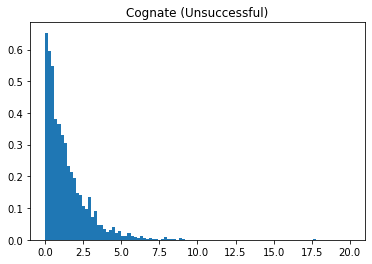

In [6]:
plt.hist(dwelltime_cog_fail,bins=100,range=(0,20),density=True);
plt.title('Cognate (Unsuccessful)')

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


4.605307487965424
4.490403279167175
106 9894 0.010713563776025874


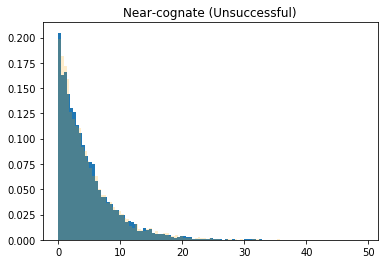

In [21]:
#Near-cognate calculation
dwelltime_nr_success = list()
dwelltime_nr_fail = list()
success_count = 0
fail_count = 0

#t2f_exp=np.random.exponential(t2f/10,size=4000)

for i in range(10000):
    dwell_t = 0
    state=1
    while state != 0 and state != 3:
        dwell_t1r = np.random.choice(t1r_exp)
        dwell_t2f = np.random.choice(t2f_exp)
        if state==1:
            if dwell_t1r<dwell_t2f: 
                dwell_t+=np.random.choice(t1r_exp)
                dwelltime_nr_fail.append(dwell_t)
                state=0
                fail_count += 1
            else:
                dwell_t+=np.random.choice(t2f_exp)
                state = 2
                
        if state==2:
            dwell_t2r_nr = np.random.choice(t2r_nr_exp)
            dwell_t3_nr = np.random.choice(t3_nr_exp)
            if dwell_t2r_nr < dwell_t3_nr:
                dwell_t+= np.random.choice(t2r_nr_exp)
                state = 1
            else:
                dwell_t += np.random.choice(t3_nr_exp)
                state = 3
                dwelltime_nr_success.append(dwell_t)
                success_count+=1
                

plt.hist(dwelltime_nr_fail,bins=100,normed=True)
plt.hist(np.random.exponential(4.6,10000),bins=100,density=True,color='orange',alpha=0.2)

print(np.mean(dwelltime_nr_fail))
print(np.std(dwelltime_nr_fail))
plt.title('Near-cognate (Unsuccessful)')
print(success_count,fail_count, success_count/fail_count)

{'k1r': 718, 'k2f': 1475, 'k2r_nr': 1120, 'k3_nr': 6, 'k4': 209}

1.3917915463762704


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Non-cognate (Unsuccessful)')

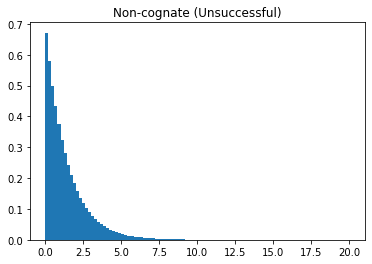

In [7]:
#Non-cognate calculation (distribution pulling from exponential)

dwelltime_non=(np.random.exponential(t1r,size=1000000))
plt.hist(dwelltime_non,bins=100,normed=True)
print(np.average(dwelltime_non))
plt.title('Non-cognate (Unsuccessful)')

Average cognate dwell time (successful): 42.5  ms
Average cognate dwell time (unsucessful): 1.7  ms
Proportion of succesful cognate incorporation vs. attempts:  0.95
Average near cognate dwell time (unsuccesful) 4.6  ms
Average non-cognate dwell time (unsuccesful) 1.4 ms


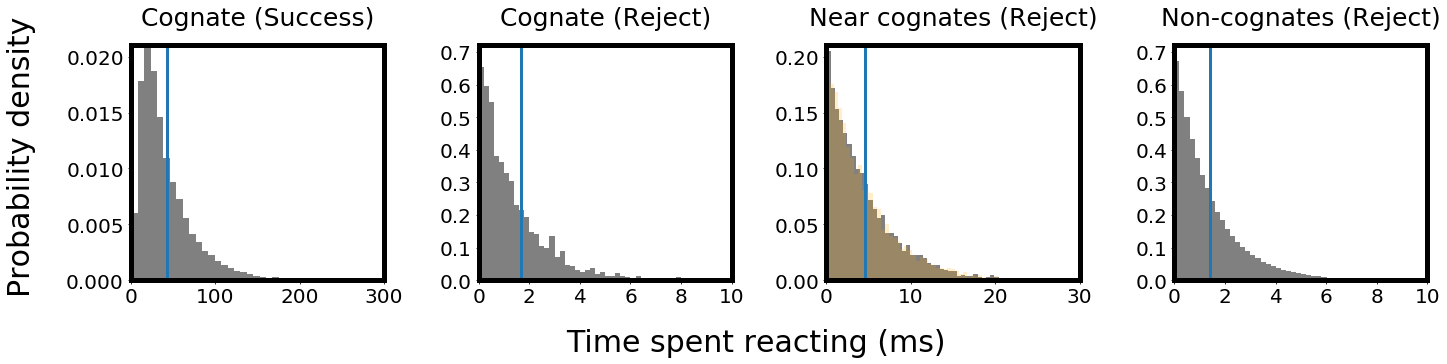

In [20]:
import matplotlib.ticker as mticker


fig = plt.figure(figsize=(20,5))
#fig.suptitle("Distribution of time spent by ternary complexes reacting with ribosomes",fontsize=35,y=1.1)

ax = plt.subplot(1,4,1)
plt.hist(dwelltime_cog_success,bins=300,density=True,color='grey')
plt.title("Cognate (Success)",fontsize=25,pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
plt.xlim(0,300)
plt.xticks(np.arange(0,301,100))
plt.yticks(np.arange(0,0.021,0.005))
plt.ylim(0,0.021)
ax.plot([np.average(dwelltime_cog_success)]*2,[0,0.021],linewidth=3)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))


ax=plt.subplot(1,4,2)
plt.hist(dwelltime_cog_fail,bins=100,range=(0,20),density=True,color='grey');
plt.title("Cognate (Reject)",fontsize=25,pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
ax.set_ylim(0,0.72)
plt.xticks(np.arange(0,11,2))
plt.xlim(0,10)
ax.plot([np.average(dwelltime_cog_fail)]*2,[0,0.72],linewidth=3)

ax=plt.subplot(1,4,3)
plt.hist(dwelltime_nr_fail,bins=100,density=True,color='grey')
plt.title("Near cognates (Reject)",fontsize=25,pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
plt.yticks(np.arange(0,0.21,0.05))
plt.xticks(np.arange(0,31,10))
plt.xlim(0,30)
plt.ylim(0,0.21)
ax.plot([np.average(dwelltime_nr_fail)]*2,[0,0.21],linewidth=3)


ax=plt.subplot(1,4,4)
plt.hist(dwelltime_non,bins=100,density=True,color='grey')
plt.title("Non-cognates (Reject)",fontsize=25,pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(ax.spines.values(), linewidth=5)
plt.xticks(np.arange(0,11,2))
ax.set_ylim(0,0.72)
plt.xlim(0,10)
ax.plot([np.average(dwelltime_non)]*2,[0,0.72],linewidth=3)



fig.text(0.5, -0.04, 'Time spent reacting (ms)', ha='center',fontsize=30)
fig.text(-0.02, 0.5, 'Probability density', va='center', rotation='vertical',fontsize=30)


print("Average cognate dwell time (successful):", round(np.average(dwelltime_cog_success),1), " ms")
print("Average cognate dwell time (unsucessful):", round(np.average(dwelltime_cog_fail),1), " ms")
print("Proportion of succesful cognate incorporation vs. attempts: ",round(len(dwelltime_cog_success)/(len(dwelltime_cog_success)+len(dwelltime_cog_fail)),2))
print("Average near cognate dwell time (unsuccesful)", round(np.average(dwelltime_nr_fail),1)," ms")
print("Average non-cognate dwell time (unsuccesful)", round(np.average(dwelltime_non),1), "ms")
plt.tight_layout(pad=3.0)

array([ 8.45204017,  1.7474242 , 10.14633105,  1.19076179,  0.26913671,
        2.12264098,  1.555087  ,  5.30471518,  0.55196831,  9.82172258])

In [72]:
##Next three cells: Showing that checking if one exponential is less than the other is equivalent to 
# drawing from a uniform

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#forward1 = 500; forward2 = 300

ta_count = 0
tb_count = 0

ta_exp=np.random.exponential(1000/500,size=4000)
tb_exp=np.random.exponential(1000/300,size=4000)

ta_uni=np.random.uniform(1000/500,size=4000)
tb_uni=np.random.uniform(1000/300,size=4000)

dwell_t = 0
for i in range(10000):
    dwell_ta = np.random.choice(ta_exp)
    dwell_tb = np.random.choice(tb_exp)
    if dwell_ta<dwell_tb: 
        dwell_t+=np.random.choice(t1r_exp)
        ta_count+=1
    else:
        dwell_t+=np.random.choice(t2f_exp)
        tb_count+=1
        
print("Dwell time, ", dwell_t, "vs. expected: ", )
print("ta", ta_count)
print("tb", tb_count)
print("tb/ta:", tb_count/ta_count, " vs. expected: ", 300/500 )

Dwell time,  11181.585751292492
ta 6289
tb 3711
tb/ta: 0.5900779138177771  vs. expected:  0.6


In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#forward1 = 500; forward2 = 300

ta_count = 0
tb_count = 0

ta_exp=np.random.exponential(1000/500,size=4000)
tb_exp=np.random.exponential(1000/300,size=4000)

ta_uni=np.random.uniform(1000/500,size=4000)
tb_uni=np.random.uniform(1000/300,size=4000)

dwell_t = 0
for i in range(10000):
    dwell_ta = np.random.choice(ta_uni)
    dwell_tb = np.random.choice(tb_uni)
    if dwell_ta<dwell_tb: 
        dwell_t+=np.random.choice(t1r_exp)
        ta_count+=1
    else:
        dwell_t+=np.random.choice(t2f_exp)
        tb_count+=1
        
print("Dwell time, ", dwell_t, "vs. expected: ", )
print("ta", ta_count)
print("tb", tb_count)
print("tb/ta:", tb_count/ta_count, " vs. expected: ", 300/500 )

Dwell time,  12452.514403459709 vs. expected: 
ta 7938
tb 2062
tb/ta: 0.2597631645250693  vs. expected:  0.6


In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#forward1 = 500; forward2 = 300

ta_count = 0
tb_count = 0

ta_exp=np.random.exponential(1000/500,size=4000)
tb_exp=np.random.exponential(1000/300,size=4000)

ta_uni=np.random.uniform(1000/500,size=4000)
tb_uni=np.random.uniform(1000/300,size=4000)
tab_uni=np.random.uniform(800,size=4000)

dwell_t = 0
for i in range(10000):
    dwell_ta = np.random.choice(ta_uni)
    dwell_tb = np.random.choice(tb_uni)
    if np.random.choice(tab_uni)<500: 
        dwell_t+=np.random.choice(t1r_exp)
        ta_count+=1
    else:
        dwell_t+=np.random.choice(t2f_exp)
        tb_count+=1
        
print("Dwell time, ", dwell_t, "vs. expected: ", )
print("ta", ta_count)
print("tb", tb_count)
print("tb/ta:", tb_count/ta_count, " vs. expected: ", 300/500 )


Dwell time,  11209.05421402803 vs. expected: 
ta 6275
tb 3725
tb/ta: 0.5936254980079682  vs. expected:  0.6
